# USar la libreria time

# Prediccion de Churn en Seguros

## Presentacion del problema

Una de las mayores perdidas de una compañia de seguros estan representadas por las polizas que aun dadas de alta, no pueden cobrar ninguna de sus cuotas en los primeros tres meses de vigencia, motivo por el cual inmediatamente la misma se anula.

Esto se conoce dentro del rubro como <b>Lapse 90</b>

El objetivo de este trabajo, es encontrar un modelo que prediga la probabilidad de que una poliza caiga dentro de esta clasificacion, con el objetivo de poder realizar alguna accion preventiva, evitando que la poliza se anule.

## Armado del dataset

En base a los datos presentes en la compañia, se genero una muestra representativa de una dataset de todas las polizas vigentes, y aquellas que fueron anuladas por Lapse 90.
La muestra comprende 300.000 polizas del canal comercial Tarjeta Naranja.

Se adjunta el codigo SQL utilizado para generar el dataset, y la muestra aleatoria del mismo.

# Repositorio

Todos los archivos necesarios se encuentra en el siguiente repositorio de github:

https://github.com/raharari/Desafio-3

# EDA

In [1]:
# Importamos las librerias basicas de python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Guardamos el path del archivo en una variable para despues cargarlo en un df

file = 'C:/Users/Ramiro/Desktop/Digital House/Desafios/Proyecto Integrador/Churn Naranja Limpio.csv'

# Creamos un DataFrame con la info del csv
df = pd.read_csv(file)

In [5]:
#Veamos algunos datos del dataset
df.head()

,Solicitud_Contrato,Producto,Ramo,Premio,Producto_Masivo,Lapse_90,Sexo,Edad,Provincia,Medio_Venta,Punto_Venta,Puesto_Venta,Rentabilidad,Segmento
0,232-405557-2407376,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,30.81,1,0,Masculino,34.0,Cordoba,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q3,Tx Con Financ.
1,301-100618-390797,SVC Tarjetas con Cl Ajuste,Vida Colectivo,36.03,1,0,Femenino,30.0,Rio Negro,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q1,Completos
2,304-100723-73514,SVC T.Naranja Todos Venden,Vida Colectivo,62.00,0,0,Femenino,40.0,Santiago del Estero,Sucursales (MV),FV Socio (PunV),Todos Venden (PueV),Q3,Completos
3,232-405557-2355690,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,37.19,1,0,Femenino,52.0,Santa Fe,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q2,Completos
4,232-405557-1165633,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,36.04,1,0,Masculino,34.0,Santa Fe,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q4,Mixto Con Financ.Z


# Seteamos el codigo de "Solicitud Contrato" como indice

In [7]:
df = df.set_index(df['Solicitud_Contrato'])
df = df.drop(columns='Solicitud_Contrato')

### Veamos como se correlacionan las variables entre si

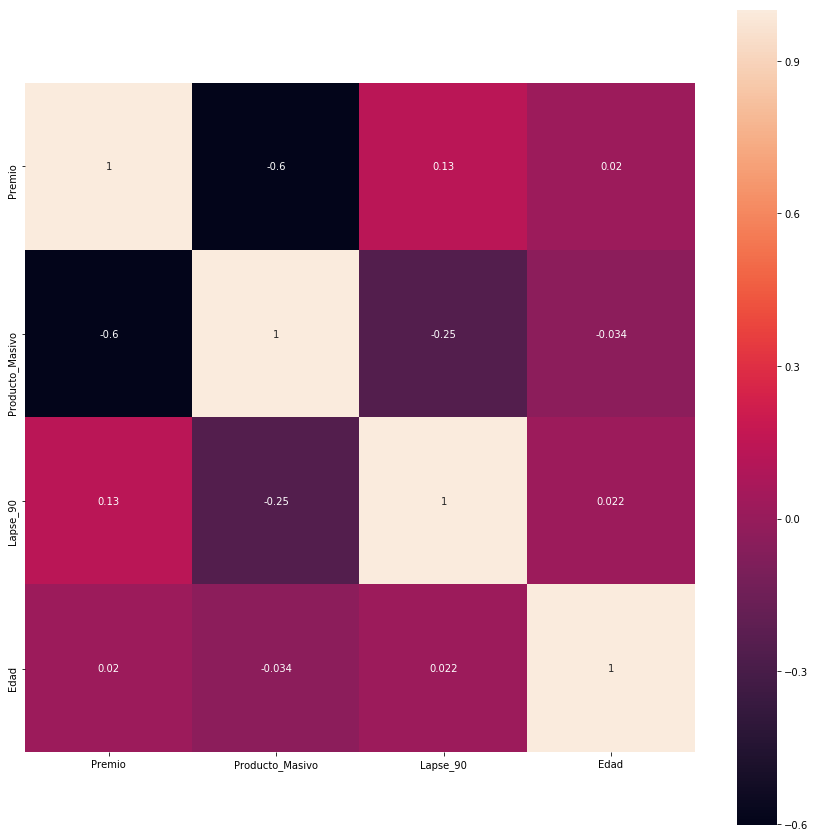

In [9]:
#Graficamos la matriz de correlacion
fig, ax = plt.subplots(figsize=(15,15))       
sns.heatmap(df.corr() , square=True, annot=True, ax=ax);

# Modelado

### Creamos variables dummies para todas las variables categoricas

In [24]:
#Producto
df = pd.concat([df, pd.get_dummies(data = df['Producto'], prefix= 'prod', drop_first=True)], axis = 1)

#Ramo
df = pd.concat([df, pd.get_dummies(data = df['Ramo'], prefix= 'ramo', drop_first=True)], axis = 1)

#Sexo
df = pd.concat([df, pd.get_dummies(data = df['Sexo'], prefix= 'sex', drop_first=True)], axis = 1)

#Provincia
df = pd.concat([df, pd.get_dummies(data = df['Provincia'], prefix= 'prov', drop_first=True)], axis = 1)

#Medio_Venta
df = pd.concat([df, pd.get_dummies(data = df['Medio_Venta'], prefix= 'mvta', drop_first=True)], axis = 1)

#Punto_Venta
df = pd.concat([df, pd.get_dummies(data = df['Punto_Venta'], prefix= 'ptovta', drop_first=True)], axis = 1)

#Puesto_Venta
df = pd.concat([df, pd.get_dummies(data = df['Puesto_Venta'], prefix= 'pstovta', drop_first=True)], axis = 1)

#Rentabilidad
df = pd.concat([df, pd.get_dummies(data = df['Rentabilidad'], prefix= 'rtb', drop_first=True)], axis = 1)

#Segmento
df = pd.concat([df, pd.get_dummies(data = df['Segmento'], prefix= 'segm', drop_first=True)], axis = 1)

In [25]:
#Dropeamos las columnas originales

df = df.drop(columns=['Producto', 'Ramo', 'Sexo','Provincia','Medio_Venta','Punto_Venta','Puesto_Venta','Rentabilidad','Segmento'])

In [27]:
df.head()

,Premio,Producto_Masivo,Lapse_90,Edad,prod_AP Autonomos Naranja,prod_AP Capital Uni. Amer. Assist,prod_AP Capital Uniforme - Sin Serv,prod_AP c Inv Kiosco Naranja,prod_ATM Plus,prod_Acc Pers Tarjetas con Cl Ajus,...,rtb_Q6,segm_Debitador,segm_Debitador Con Financ.,segm_Esporadico,segm_Esporádico,segm_Mixto,segm_Mixto Con Financ.Z,segm_Sin Segmento,segm_Tx Con Financ.,segm_Tx Sin Financ.
Solicitud_Contrato,,,,,,,,,,,,,,,,,,,,,
232-405557-2407376,30.81,1,0,34.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
301-100618-390797,36.03,1,0,30.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304-100723-73514,62.00,0,0,40.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232-405557-2355690,37.19,1,0,52.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
232-405557-1165633,36.04,1,0,34.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [28]:
df.shape

(299549, 120)

### Naive Bayes
Vamos a utilizar un modelo Naive Bayes como un benchmark y tener un punto de partida del cual poder mejorar

In [29]:
#Separamos el dataset en matriz de features y variable objetivo

X =  df.drop(['Lapse_90'], axis = 1)
y = df['Lapse_90']

In [30]:
print(X.shape, y.shape)

(299549, 119) (299549,)


In [30]:
# Separamos nuestro dataset en Train y Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#### Estandarizacion

In [32]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [33]:
#Chequeamos la media y el desvio
print('media:',np.mean(X_train[:,1]))
print('desvio:',np.std(X_train[:,1]))

media: -3.852208670645114e-17
desvio: 1.0


In [34]:
from sklearn.naive_bayes import GaussianNB
modelo_NB = GaussianNB()
modelo_NB.fit(X_train, y_train)

GaussianNB(priors=None)

In [35]:
#Estandarizamos el set de testeo con lo que aprendio el Scaler
X_test = scaler.transform(X_test)
# Predicción
labels_predichas = modelo_NB.predict(X_test)

In [36]:
#Analizamos la performance del modelo
from sklearn.metrics import confusion_matrix
% matplotlib inline

In [37]:
# Primero calculamos el accuracy general del modelo
from sklearn.metrics import accuracy_score
accuracy_NB = accuracy_score(y_test, labels_predichas)
accuracy_score(y_test, labels_predichas)

0.8259801303279564

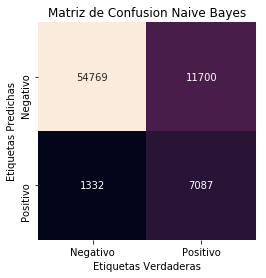

In [38]:
# Ahora calculamos la matriz de confusión
mat = confusion_matrix(y_test, labels_predichas)

ax = plt.axes()

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'], ax=ax)

ax.set_title('Matriz de Confusion Naive Bayes')

plt.xlabel('Etiquetas Verdaderas')
plt.ylabel('Etiquetas Predichas');

## Conclusion

El modelo de Naive Bayes arrojo una accuracy de 82%. Este es el resultado que vamos a querer mejorar mediante la aplicacion de otros modelos de clasificacion.
Analicemos entonces las metricas de recall y precision para ver si el modelo esta teniendo muchos falsos positivos o falsos negativos

In [39]:
#Separamos los verdaderos positivos y negativos, de los falsos positivos y negativos

TP = mat[1, 1]
TN = mat[0, 0]
FP = mat[0, 1]
FN = mat[1, 0]

In [40]:
#Classification Error
class_error_NB = (1 - accuracy_NB)
class_error_NB

0.17401986967204364

In [41]:
#Recall
from sklearn.metrics import recall_score

recall_NB = recall_score(y_test, labels_predichas)
recall_NB

0.37722893490179377

In [42]:
#Specificity
specificity_NB = TN / (TN + FP)
specificity_NB

0.97625710771644

In [43]:
#Precision
from sklearn.metrics import precision_score

precision_NB = precision_score(y_test, labels_predichas)
precision_NB

0.8417864354436394

In [44]:
#F1 Score
from sklearn.metrics import f1_score

f1_NB = f1_score(y_test, labels_predichas)
f1_NB

0.5209880173491142

In [45]:
#Creamos un diccionario para despues poder comparar las metricas de todos los modelos

dict_Naive_Bayes = {'Modelo': 'Naive Bayes',
                    'Accuracy': accuracy_NB,
                    'Classification Error': class_error_NB,
                    'Recall': recall_NB,
                    'Specificity': specificity_NB,
                    'Precision': precision_NB,
                    'F1 Score': f1_NB,
                    'Tiempo de Entrenamiento (m)': 0.01
                   }

In [46]:
dict_Naive_Bayes

{'Modelo': 'Naive Bayes',
 'Accuracy': 0.8259801303279564,
 'Classification Error': 0.17401986967204364,
 'Recall': 0.37722893490179377,
 'Specificity': 0.97625710771644,
 'Precision': 0.8417864354436394,
 'F1 Score': 0.5209880173491142,
 'Tiempo de Entrenamiento (m)': 0.01}

Vemos que el modelo es muy especifico y tiene un recall relativamente bajo. Esta ultima metrica nos interesa que sea alta, ya que queremos minimizar el porcentaje de falsos negativos. Es preferible realizar una accion sobre un cliente que creemos que se va a caer, pero al final no lo hace, que no realizar una accion sobre uno que si se cae.

## CatBoost + GridSearch (o randomized???)

In [38]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

CatBoost es un algoritmo de Gradient Boosting, que requiere que todos los datos sean del tipo string o integer. Por lo cual vamos a tener que transformar la variable de premio en integer

In [5]:
# Modificamos la columna de premio
df_catboost = df
#df_catboost['Premio'] = df_catboost['Premio'].astype(int)

In [6]:
#Separamos el dataset en matriz de features y variable objetivo

X_cb =  df_catboost.drop(['Lapse_90'], axis = 1)
y_cb = df_catboost['Lapse_90']

In [9]:
# Inicializo mis sets de testeo y training
train_set, test_set, train_label, test_label = train_test_split(X_cb, y_cb, test_size=0.25, random_state=1)

In [49]:
# Definimos una lista de hiperparametros a tunear
l2_reg_range = [3,5,7,10]
profundidad = [2,4,6,8,10]
learn_rate = [0.01,0.03,0.1,0.5,1]

In [50]:
#Generamos la grilla para GridSearch

param_grid = dict(l2_leaf_reg = l2_reg_range, depth=profundidad, learning_rate = learn_rate)
print(param_grid)

{'l2_leaf_reg': [3, 5, 7, 10], 'depth': [2, 4, 6, 8, 10], 'learning_rate': [0.01, 0.03, 0.1, 0.5, 1]}


In [52]:
%%time
cb = CatBoostClassifier(loss_function='Logloss', logging_level='Verbose', iterations = 100)
cb_model = GridSearchCV(cb, param_grid, cv = 5)
cb_model.fit(train_set, train_label)

0:	learn: 0.6843469	total: 232ms	remaining: 232ms
1:	learn: 0.6757744	total: 267ms	remaining: 0us
0:	learn: 0.6843122	total: 43.4ms	remaining: 43.4ms
1:	learn: 0.6757061	total: 82.2ms	remaining: 0us
0:	learn: 0.6843559	total: 38ms	remaining: 38ms
1:	learn: 0.6757921	total: 73.2ms	remaining: 0us
0:	learn: 0.6843357	total: 39.9ms	remaining: 39.9ms
1:	learn: 0.6757522	total: 75.3ms	remaining: 0us
0:	learn: 0.6843764	total: 40.2ms	remaining: 40.2ms
1:	learn: 0.6758324	total: 75.6ms	remaining: 0us
0:	learn: 0.6671719	total: 38ms	remaining: 38ms
1:	learn: 0.6265787	total: 73.3ms	remaining: 0us
0:	learn: 0.6670701	total: 36.9ms	remaining: 36.9ms
1:	learn: 0.6429996	total: 72.1ms	remaining: 0us
0:	learn: 0.6671982	total: 40.4ms	remaining: 40.4ms
1:	learn: 0.6268787	total: 77.1ms	remaining: 0us
0:	learn: 0.6671388	total: 45.6ms	remaining: 45.6ms
1:	learn: 0.6267165	total: 93.2ms	remaining: 0us
0:	learn: 0.6672583	total: 37.1ms	remaining: 37.1ms
1:	learn: 0.6433575	total: 73.9ms	remaining: 0us
0

0:	learn: 0.6671982	total: 36.7ms	remaining: 36.7ms
1:	learn: 0.6432435	total: 72.1ms	remaining: 0us
0:	learn: 0.6671388	total: 38.8ms	remaining: 38.8ms
1:	learn: 0.6267165	total: 75ms	remaining: 0us
0:	learn: 0.6672583	total: 40.2ms	remaining: 40.2ms
1:	learn: 0.6270246	total: 77.9ms	remaining: 0us
0:	learn: 0.6115075	total: 38.1ms	remaining: 38.1ms
1:	learn: 0.5548759	total: 73.3ms	remaining: 0us
0:	learn: 0.6111933	total: 36.3ms	remaining: 36.3ms
1:	learn: 0.5460313	total: 71.4ms	remaining: 0us
0:	learn: 0.6115860	total: 36.3ms	remaining: 36.3ms
1:	learn: 0.5460472	total: 70.9ms	remaining: 0us
0:	learn: 0.6114029	total: 36.1ms	remaining: 36.1ms
1:	learn: 0.5460895	total: 70.5ms	remaining: 0us
0:	learn: 0.6117687	total: 36ms	remaining: 36ms
1:	learn: 0.5464929	total: 70.6ms	remaining: 0us
0:	learn: 0.4135986	total: 42.9ms	remaining: 42.9ms
1:	learn: 0.3355026	total: 80.5ms	remaining: 0us
0:	learn: 0.4126447	total: 36.7ms	remaining: 36.7ms
1:	learn: 0.3346095	total: 71.9ms	remaining: 

Training has stopped (degenerate solution on iteration 1, probably too small l2-regularization, try to increase it)


0:	learn: 0.3147540	total: 44.2ms	remaining: 44.2ms
1:	learn: nan	total: 87.8ms	remaining: 0us


Training has stopped (degenerate solution on iteration 1, probably too small l2-regularization, try to increase it)


0:	learn: 0.3156203	total: 44.2ms	remaining: 44.2ms
1:	learn: nan	total: 87.8ms	remaining: 0us


Training has stopped (degenerate solution on iteration 1, probably too small l2-regularization, try to increase it)


0:	learn: 0.3150872	total: 44.5ms	remaining: 44.5ms
1:	learn: nan	total: 88.4ms	remaining: 0us


Training has stopped (degenerate solution on iteration 1, probably too small l2-regularization, try to increase it)


0:	learn: 0.3166439	total: 43.9ms	remaining: 43.9ms
1:	learn: nan	total: 87.4ms	remaining: 0us


Training has stopped (degenerate solution on iteration 1, probably too small l2-regularization, try to increase it)


0:	learn: 0.6827179	total: 44.3ms	remaining: 44.3ms
1:	learn: 0.6725750	total: 87ms	remaining: 0us
0:	learn: 0.6826694	total: 43.5ms	remaining: 43.5ms
1:	learn: 0.6724800	total: 85.8ms	remaining: 0us
0:	learn: 0.6827259	total: 43.6ms	remaining: 43.6ms
1:	learn: 0.6668686	total: 85.8ms	remaining: 0us
0:	learn: 0.6826818	total: 48.3ms	remaining: 48.3ms
1:	learn: 0.6667632	total: 95.8ms	remaining: 0us
0:	learn: 0.6827704	total: 43.3ms	remaining: 43.3ms
1:	learn: 0.6669560	total: 89ms	remaining: 0us
0:	learn: 0.6624138	total: 46.5ms	remaining: 46.5ms
1:	learn: 0.6194125	total: 92.8ms	remaining: 0us
0:	learn: 0.6622729	total: 44.7ms	remaining: 44.7ms
1:	learn: 0.6175320	total: 89.3ms	remaining: 0us
0:	learn: 0.6624366	total: 46.6ms	remaining: 46.6ms
1:	learn: 0.6183097	total: 91ms	remaining: 0us
0:	learn: 0.6623093	total: 44.5ms	remaining: 44.5ms
1:	learn: 0.6180254	total: 87.6ms	remaining: 0us
0:	learn: 0.6625663	total: 43.9ms	remaining: 43.9ms
1:	learn: 0.6199670	total: 89.8ms	remaining: 

0:	learn: 0.6425325	total: 57.2ms	remaining: 57.2ms
1:	learn: 0.5975997	total: 112ms	remaining: 0us
0:	learn: 0.6424147	total: 56.2ms	remaining: 56.2ms
1:	learn: 0.5973685	total: 112ms	remaining: 0us
0:	learn: 0.6427921	total: 56.3ms	remaining: 56.3ms
1:	learn: 0.5980034	total: 112ms	remaining: 0us
0:	learn: 0.5405414	total: 57.2ms	remaining: 57.2ms
1:	learn: 0.4747943	total: 109ms	remaining: 0us
0:	learn: 0.5396536	total: 57.1ms	remaining: 57.1ms
1:	learn: 0.4736842	total: 107ms	remaining: 0us
0:	learn: 0.5411319	total: 67.1ms	remaining: 67.1ms
1:	learn: 0.4777002	total: 124ms	remaining: 0us
0:	learn: 0.5407636	total: 57.3ms	remaining: 57.3ms
1:	learn: 0.4747373	total: 120ms	remaining: 0us
0:	learn: 0.5416451	total: 57.5ms	remaining: 57.5ms
1:	learn: 0.4758406	total: 109ms	remaining: 0us
0:	learn: 0.2842315	total: 71.2ms	remaining: 71.2ms
1:	learn: 0.2525503	total: 141ms	remaining: 0us
0:	learn: 0.2834414	total: 58.1ms	remaining: 58.1ms
1:	learn: 0.2522478	total: 108ms	remaining: 0us


0:	learn: 0.2844963	total: 56.9ms	remaining: 56.9ms
1:	learn: 0.2532343	total: 108ms	remaining: 0us
0:	learn: 0.2836384	total: 62.3ms	remaining: 62.3ms
1:	learn: 0.2526299	total: 114ms	remaining: 0us
0:	learn: 0.2847312	total: 58.1ms	remaining: 58.1ms
1:	learn: 0.2531045	total: 110ms	remaining: 0us
0:	learn: 0.2843267	total: 63.1ms	remaining: 63.1ms
1:	learn: 0.2531543	total: 116ms	remaining: 0us
0:	learn: 0.2868960	total: 59.5ms	remaining: 59.5ms
1:	learn: 0.2450291	total: 111ms	remaining: 0us
0:	learn: 0.2465812	total: 68ms	remaining: 68ms
1:	learn: 0.2238621	total: 123ms	remaining: 0us
0:	learn: 0.2461556	total: 57.3ms	remaining: 57.3ms
1:	learn: 0.2216092	total: 111ms	remaining: 0us
0:	learn: 0.2466883	total: 61.9ms	remaining: 61.9ms
1:	learn: 0.2233236	total: 121ms	remaining: 0us
0:	learn: 0.2462402	total: 58ms	remaining: 58ms
1:	learn: 0.2228080	total: 112ms	remaining: 0us
0:	learn: 0.2472818	total: 63.9ms	remaining: 63.9ms
1:	learn: 0.2245917	total: 122ms	remaining: 0us
0:	learn

0:	learn: 0.2296250	total: 69.6ms	remaining: 69.6ms
1:	learn: 0.2144863	total: 125ms	remaining: 0us
0:	learn: 0.2304536	total: 97.2ms	remaining: 97.2ms
1:	learn: 0.2133432	total: 186ms	remaining: 0us
0:	learn: 0.6751835	total: 68.5ms	remaining: 68.5ms
1:	learn: 0.6578864	total: 135ms	remaining: 0us
0:	learn: 0.6750473	total: 78.3ms	remaining: 78.3ms
1:	learn: 0.6576228	total: 157ms	remaining: 0us
0:	learn: 0.6752698	total: 86ms	remaining: 86ms
1:	learn: 0.6580512	total: 172ms	remaining: 0us
0:	learn: 0.6752068	total: 70.3ms	remaining: 70.3ms
1:	learn: 0.6579330	total: 137ms	remaining: 0us
0:	learn: 0.6753206	total: 71.2ms	remaining: 71.2ms
1:	learn: 0.6581517	total: 139ms	remaining: 0us
0:	learn: 0.6407383	total: 69.4ms	remaining: 69.4ms
1:	learn: 0.5939661	total: 137ms	remaining: 0us
0:	learn: 0.6403522	total: 81.2ms	remaining: 81.2ms
1:	learn: 0.5934257	total: 149ms	remaining: 0us
0:	learn: 0.6409811	total: 72ms	remaining: 72ms
1:	learn: 0.5945561	total: 143ms	remaining: 0us
0:	learn

0:	learn: 0.6340646	total: 91.9ms	remaining: 91.9ms
1:	learn: 0.5870333	total: 182ms	remaining: 0us
0:	learn: 0.6401712	total: 91.4ms	remaining: 91.4ms
1:	learn: 0.5930362	total: 181ms	remaining: 0us
0:	learn: 0.6400004	total: 110ms	remaining: 110ms
1:	learn: 0.5924985	total: 215ms	remaining: 0us
0:	learn: 0.6403320	total: 96ms	remaining: 96ms
1:	learn: 0.5883301	total: 192ms	remaining: 0us
0:	learn: 0.5330650	total: 94.8ms	remaining: 94.8ms
1:	learn: 0.4171350	total: 191ms	remaining: 0us
0:	learn: 0.5319362	total: 113ms	remaining: 113ms
1:	learn: 0.4154938	total: 220ms	remaining: 0us
0:	learn: 0.5336940	total: 93.9ms	remaining: 93.9ms
1:	learn: 0.4153990	total: 185ms	remaining: 0us
0:	learn: 0.5331493	total: 91.9ms	remaining: 91.9ms
1:	learn: 0.4269343	total: 181ms	remaining: 0us
0:	learn: 0.5340297	total: 90.6ms	remaining: 90.6ms
1:	learn: 0.4290785	total: 181ms	remaining: 0us
0:	learn: 0.2618085	total: 92.1ms	remaining: 92.1ms
1:	learn: 0.2265887	total: 173ms	remaining: 0us
0:	learn

In [53]:
pd.DataFrame(cb_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_l2_leaf_reg,param_learning_rate,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.529723,0.106677,0.501527,0.007915,2,3,0.01,"{'depth': 2, 'l2_leaf_reg': 3, 'learning_rate'...",0.831638,0.828652,...,0.829824,0.001047,91,0.829370,0.830116,0.830044,0.829777,0.829810,0.829824,0.000262
1,2.542445,0.073182,0.504144,0.032880,2,3,0.03,"{'depth': 2, 'l2_leaf_reg': 3, 'learning_rate'...",0.829747,0.828652,...,0.829085,0.001218,98,0.828858,0.830116,0.828731,0.829571,0.829810,0.829417,0.000539
2,2.561653,0.044304,0.485568,0.007576,2,3,0.1,"{'depth': 2, 'l2_leaf_reg': 3, 'learning_rate'...",0.834020,0.831301,...,0.833349,0.001763,89,0.832886,0.833566,0.834156,0.833444,0.832431,0.833297,0.000592
3,2.493181,0.030642,0.490129,0.012693,2,3,0.5,"{'depth': 2, 'l2_leaf_reg': 3, 'learning_rate'...",0.826453,0.845344,...,0.837907,0.011389,85,0.822810,0.848194,0.847170,0.847927,0.823952,0.838010,0.011955
4,2.457870,0.038539,0.508860,0.022417,2,3,1,"{'depth': 2, 'l2_leaf_reg': 3, 'learning_rate'...",0.849353,0.844943,...,0.847886,0.002161,81,0.847520,0.848622,0.847660,0.848416,0.847214,0.847886,0.000540
5,2.519640,0.045526,0.491617,0.014135,2,5,0.01,"{'depth': 2, 'l2_leaf_reg': 5, 'learning_rate'...",0.831638,0.828652,...,0.829824,0.001047,91,0.829370,0.830116,0.830044,0.829777,0.829810,0.829824,0.000262
6,2.557786,0.051430,0.504261,0.017218,2,5,0.03,"{'depth': 2, 'l2_leaf_reg': 5, 'learning_rate'...",0.829747,0.828652,...,0.829267,0.001696,95,0.828858,0.830116,0.830044,0.829571,0.828269,0.829372,0.000711
7,2.578392,0.104604,0.504765,0.018536,2,5,0.1,"{'depth': 2, 'l2_leaf_reg': 5, 'learning_rate'...",0.834020,0.831301,...,0.833153,0.001714,90,0.832886,0.833566,0.833216,0.833694,0.832431,0.833159,0.000460
8,2.493953,0.041354,0.495893,0.016273,2,5,0.5,"{'depth': 2, 'l2_leaf_reg': 5, 'learning_rate'...",0.847261,0.845344,...,0.836491,0.012077,86,0.847714,0.848194,0.824035,0.847927,0.823952,0.838364,0.011735
9,2.504650,0.079521,0.488816,0.004082,2,5,1,"{'depth': 2, 'l2_leaf_reg': 5, 'learning_rate'...",0.849353,0.844943,...,0.847886,0.002161,81,0.847520,0.848622,0.847660,0.848416,0.847214,0.847886,0.000540


In [54]:
cb_model.best_estimator_, cb_model.best_score_, cb_model.best_params_

(<catboost.core.CatBoostClassifier at 0xe35c105668>,
 0.899083508041004,
 {'depth': 10, 'l2_leaf_reg': 7, 'learning_rate': 0.5})

## Utilizamos el mejor modelo para entrenar los datos

In [70]:
cb_best = CatBoostClassifier(l2_leaf_reg = 7,iterations=2, depth=10, learning_rate=0.5, loss_function='Logloss', logging_level='Verbose')
cb_best.fit(train_set, train_label)

0:	learn: 0.2620709	total: 111ms	remaining: 5.45s
1:	learn: 0.2252838	total: 218ms	remaining: 5.22s
2:	learn: 0.2142703	total: 309ms	remaining: 4.85s
3:	learn: 0.2099757	total: 409ms	remaining: 4.7s
4:	learn: 0.2050743	total: 507ms	remaining: 4.56s
5:	learn: 0.1966955	total: 620ms	remaining: 4.54s
6:	learn: 0.1930042	total: 732ms	remaining: 4.5s
7:	learn: 0.1892389	total: 853ms	remaining: 4.48s
8:	learn: 0.1875720	total: 967ms	remaining: 4.41s
9:	learn: 0.1864255	total: 1.07s	remaining: 4.29s
10:	learn: 0.1850875	total: 1.18s	remaining: 4.17s
11:	learn: 0.1813771	total: 1.29s	remaining: 4.1s
12:	learn: 0.1798078	total: 1.41s	remaining: 4.02s
13:	learn: 0.1786772	total: 1.5s	remaining: 3.86s
14:	learn: 0.1780516	total: 1.61s	remaining: 3.77s
15:	learn: 0.1770904	total: 1.72s	remaining: 3.65s
16:	learn: 0.1765390	total: 1.8s	remaining: 3.5s
17:	learn: 0.1759377	total: 1.92s	remaining: 3.41s
18:	learn: 0.1752966	total: 2.07s	remaining: 3.38s
19:	learn: 0.1748356	total: 2.2s	remaining: 3.3

In [63]:
#Predecimos las etiquetas del set de testeo
preds_class = cb_best.predict(test_set)
preds_proba = cb_best.predict_proba(test_set)
print("class = ", preds_class)
print("proba = ", preds_proba)

class =  [0. 0. 0. ... 1. 0. 0.]
proba =  [[0.97428698 0.02571302]
 [0.58820939 0.41179061]
 [0.56342117 0.43657883]
 ...
 [0.43483675 0.56516325]
 [0.97428698 0.02571302]
 [0.88687476 0.11312524]]


## Probamos sobre el set de testeo

In [71]:
#Score del modelo en el set de testeo
accuracy_CAT = cb_best.score(test_set, test_label)
accuracy_CAT

0.9175168251255208

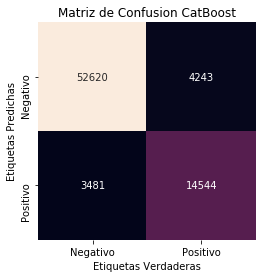

In [65]:
# Matriz de confusión:
mat_cat = confusion_matrix(test_label, preds_class)

ax = plt.axes()

sns.heatmap(mat_cat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'],
           ax=ax)
ax.set_title('Matriz de Confusion CatBoost')
plt.xlabel('Etiquetas Verdaderas')
plt.ylabel('Etiquetas Predichas');

In [67]:
#Separamos los verdaderos positivos y negativos, de los falsos positivos y negativos

TP = mat_cat[1, 1]
TN = mat_cat[0, 0]
FP = mat_cat[0, 1]
FN = mat_cat[1, 0]

#Classification Error
class_error_CAT = (1 - accuracy_CAT)
#Recall
recall_CAT = recall_score(test_label, preds_class)
#Specificity
specificity_CAT = TN / (TN + FP)
#Precision
precision_CAT = precision_score(test_label, preds_class)
#F1 Score
f1_CAT = f1_score(test_label, preds_class)

In [68]:
#Creamos un diccionario para despues poder comparar las metricas de todos los modelos

dict_CatBoost = {  'Modelo': 'CatBoost + GridSearch',
                    'Accuracy': accuracy_CAT,
                    'Classification Error': class_error_CAT,
                    'Recall': recall_CAT,
                    'Specificity': specificity_CAT,
                    'Precision': precision_CAT,
                    'F1 Score': f1_CAT,
                    'Tiempo de Entrenamiento (m)': 42
                 }

In [69]:
dict_CatBoost

{'Modelo': 'CatBoost',
 'Accuracy': 0.8968593099027882,
 'Classification Error': 0.10314069009721183,
 'Recall': 0.7741523393836164,
 'Specificity': 0.9379511951658616,
 'Precision': 0.8068793342579751,
 'F1 Score': 0.7901771161577746,
 'Tiempo de Entrenamiento (m)': 0.067}

# ----------------------------------------------

# XGBoost

In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [27]:
#Separo la matriz de features y la variable objetivo

X =  df.drop(['Lapse_90'], axis = 1)
y = df['Lapse_90']

In [28]:
#Transformo la estructura de datos en una DataMatrix de XGBoost

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [31]:
#Separo en Train y Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [39]:
#Instancio el Clasificador de XGBoost

xg_clas = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [40]:
%%time
#Fiteo el modelo

xg_clas.fit(X_train,y_train)

#Predicciones
preds = xg_clas.predict(X_test)

Wall time: 1min 4s


In [34]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.350481


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.8771632304240999

# XGBoost CV

In [42]:
%%time
#Seteo los parametros
params = {'objective':'binary:logistic','colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10,
          'n_estimators':100}

#CV
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics=['error', 'auc', 'rmse'], as_pandas=True, seed=1)

XGBoostError: b'[18:31:52] C:\\Users\\Administrator\\Desktop\\xgboost\\src\\metric\\metric.cc:21: Unknown metric function accuracy'

In [47]:
cv_results.head()

,train-auc-mean,train-auc-std,train-error-mean,train-error-std,train-rmse-mean,train-rmse-std,test-auc-mean,test-auc-std,test-error-mean,test-error-std,test-rmse-mean,test-rmse-std
0,0.792223,0.000564,0.187901,0.000088,0.477251,0.000014,0.791875,0.001466,0.188073,0.000285,0.477266,0.000015
1,0.806127,0.013730,0.183591,0.005117,0.461433,0.000804,0.806595,0.015709,0.183222,0.004984,0.461411,0.000837
2,0.849067,0.064130,0.183471,0.018255,0.442294,0.006878,0.848666,0.064276,0.183753,0.017966,0.442271,0.006841
3,0.941792,0.009552,0.147814,0.017760,0.414948,0.005996,0.941646,0.009076,0.148166,0.017647,0.414955,0.005937
4,0.945165,0.009907,0.141690,0.016950,0.400691,0.007674,0.945012,0.009676,0.141299,0.017351,0.400695,0.007748


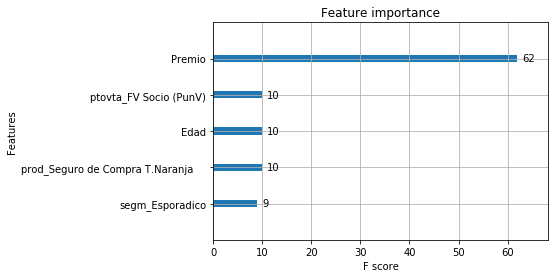

In [37]:
xgb.plot_importance(xg_clas.best_estimator_, max_num_features=5)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# XGBoost + GridSearch???

# Comparacion de resultados

In [99]:
#Juntamos todos los diccionarios en un dataframe
diccionarios = [dict_Naive_Bayes,dict_Logistic,dict_KNN,dict_CatBoost]
resultados = pd.DataFrame(diccionarios)

#Reordenamos las columnas
resultados = resultados[['Modelo','Accuracy','Classification Error','Recall','Specificity','Precision','F1 Score','Tiempo de Entrenamiento (m)']]


In [100]:
resultados

,Modelo,Accuracy,Classification Error,Recall,Specificity,Precision,F1 Score,Tiempo de Entrenamiento (m)
0,Naive Bayes,0.825192,0.174808,0.383829,0.972995,0.826381,0.524189,0.010
1,Regresion Logistica,0.856920,0.143080,0.537233,0.963976,0.833168,0.653247,11.000
2,KNN,0.860592,0.139408,0.590089,0.951177,0.801881,0.679872,1020.000
3,CatBoost,0.886577,0.113423,0.760792,0.928700,0.781337,0.770928,0.067


In [103]:
res_trans = resultados.set_index(resultados['Modelo'])
res_trans.T

Modelo,Naive Bayes,Regresion Logistica,KNN,CatBoost
Modelo,Naive Bayes,Regresion Logistica,KNN,CatBoost
Accuracy,0.825192,0.85692,0.860592,0.886577
Classification Error,0.174808,0.14308,0.139408,0.113423
Recall,0.383829,0.537233,0.590089,0.760792
Specificity,0.972995,0.963976,0.951177,0.9287
Precision,0.826381,0.833168,0.801881,0.781337
F1 Score,0.524189,0.653247,0.679872,0.770928
Tiempo de Entrenamiento (m),0.01,11,1020,0.067


### Curvas ROC

In [115]:
from sklearn.metrics import roc_curve, auc

In [113]:
#Calculo de probabilidades

y_probs_nb = modelo_NB.predict_proba(X_test)
y_probs_LG = lg_final.predict_proba(X_test)
y_probs_KNN = KNN_final.predict_proba(X_test)
y_probs_CAT = modelo_catboost.predict_proba(test_set)

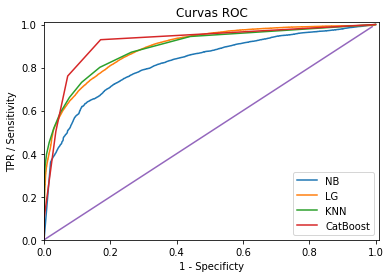

In [117]:
#Curvas ROC
##NB
fpr_nb,tpr_nb,thr_nb = roc_curve(y_test, y_probs_nb[:,1])
##LG
fpr_lg,tpr_lg,thr_lg = roc_curve(y_test, y_probs_LG[:,1])
##KNN
fpr_knn,tpr_knn,thr_knn = roc_curve(y_test, y_probs_KNN[:,1])
##CatBoost
fpr_cat,tpr_cat,thr_cat = roc_curve(test_label, y_probs_CAT[:,1])

#Rango de los ejes
plt.axis([0, 1.01, 0, 1.01])

#Etiquetas de los ejes
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')

#Titulo
plt.title('Curvas ROC')

#Plot de las curvas
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_lg,tpr_lg)
plt.plot(fpr_knn,tpr_knn)
plt.plot(fpr_cat,tpr_cat)

#Recta
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))

#Leyenda
plt.legend(['NB','LG','KNN','CatBoost'])
plt.show() 

### AUC de los modelos

In [118]:
print('AUC NB=', auc(fpr_nb, tpr_nb))
print('AUC LG=', auc(fpr_lg, tpr_lg))
print('AUC KNN=', auc(fpr_knn, tpr_knn))
print('AUC CatBoost=', auc(fpr_cat, tpr_cat))

AUC NB= 0.8242559060915204
AUC LG= 0.8934726376001814
AUC KNN= 0.8926932260421311
AUC CatBoost= 0.9173675342842253


In [119]:
AUC_NB=auc(fpr_nb, tpr_nb)
AUC_LG=auc(fpr_lg, tpr_lg)
AUC_KNN=auc(fpr_knn, tpr_knn)
AUC_CatBoost=auc(fpr_cat, tpr_cat)

In [120]:
#Agregamos los resultados al dataframe

resultados['AUC'] = [AUC_NB, AUC_LG, AUC_KNN, AUC_CatBoost]

In [121]:
resultados

,Modelo,Accuracy,Classification Error,Recall,Specificity,Precision,F1 Score,Tiempo de Entrenamiento (m),AUC
0,Naive Bayes,0.825192,0.174808,0.383829,0.972995,0.826381,0.524189,0.010,0.824256
1,Regresion Logistica,0.856920,0.143080,0.537233,0.963976,0.833168,0.653247,11.000,0.893473
2,KNN,0.860592,0.139408,0.590089,0.951177,0.801881,0.679872,1020.000,0.892693
3,CatBoost,0.886577,0.113423,0.760792,0.928700,0.781337,0.770928,0.067,0.917368


In [122]:
#Guardamos los resultados en un archivo
resultados.to_csv('C:/Users/Ramiro/Desktop/Digital House/Desafios/Desafio 3/Resultados.csv')

# Graficos comparativos

In [19]:
### Comparacion de las metricas de todos los modelos

## Naive Bayes como baseline
trace1 = go.Bar(
    x=['Accuracy', 'Recall', 'Precission', 'F1 Score'],
    y=[resultados['Accuracy'][0], resultados['Recall'][0], resultados['Precision'][0], resultados['F1 Score'][0]],
    name='Naive Bayes'
)


## Regresion logistica
trace2 = go.Bar(
    x=['Accuracy', 'Recall', 'Precission', 'F1 Score'],
    y=[resultados['Accuracy'][1], resultados['Recall'][1], resultados['Precision'][1], resultados['F1 Score'][1]],
    name='Logistic Regression'
)


## KNN
trace3 = go.Bar(
    x=['Accuracy', 'Recall', 'Precission', 'F1 Score'],
    y=[resultados['Accuracy'][2], resultados['Recall'][2], resultados['Precision'][2], resultados['F1 Score'][2]],
    name='KNN'
)


## CatBoost
trace4 = go.Bar(
    x=['Accuracy', 'Recall', 'Precission', 'F1 Score'],
    y=[resultados['Accuracy'][3], resultados['Recall'][3], resultados['Precision'][3], resultados['F1 Score'][3]],
    name='CatBoost'
)


data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    barmode='group',
    title = 'Comparacion de Metricas'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

# Conclusiones

Para nuestro problema en particular no solo es importante un accuracy alto, sino que tambien nos interesa minimizar los falsos negativos. Es mucho mas costoso para la compañia no realizar una accion sobre un cliente que va a entrar en default y perder esa poliza, que "molestar" a un cliente que finalmente no entrara en default (falso positivo). Es por esto que tambien nos interesa que el modelo tenga una metrica recall alta, de manera que minimice esos casos.

La familia de algoritmos de gradient boosting (Light GBM, CatBoost XGBoost) funcionan particularmente bien para este tipo de problemas, y en este caso, que no se evaluo el modelo con cross-validation, presentan un tiempo de entrenamiento bastante aceptable (sobretodo comparado con KNN que es altamente exigente sobre los recursos).

En conclusion, la mejor alternativa para la solucion de este tipo de problemas es algun algoritmo de gradient boosting, en este caso seleccionaremos CatBoost. En siguientes iteraciones, tunearemos los hiperparametros mediante GridSerach o RandomSearch para poder acercanos aun a una mejor prediccion.